In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from scipy.integrate import odeint

In [34]:
def find_fixed_points(r) :
    fixed = []
    a, b = 1, 2
    alpha, beta = 0.25, 1.50
    r_range = np.arange(0, r, 0.01)
    for x in r_range :
        for y in r_range :
            if x*(a - x - alpha*y) == 0 and y*(b - y - beta*x) == 0 :
                fixed.append((y, x))
    
    return fixed

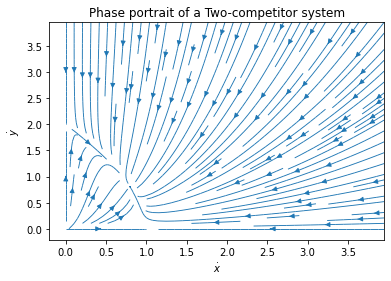

In [77]:
x, y = np.meshgrid(np.arange(0, 4, 0.05), np.arange(0, 4, 0.05))

a, b = 1, 2
alpha, beta = 0.25, 1.50

xdot = x*(a - x - alpha*y)
ydot = y*(b - y - beta*x)

pl.streamplot(x, y, xdot, ydot, linewidth=0.9, density = 1.3)
pl.xlabel(r"$\dot{x}$")
pl.title("Phase portrait of a Two-competitor system")
pl.ylabel(r"$\dot{y}$")
pl.savefig("TwoCompetitor.png", dpi=240)

In [37]:
y = find_fixed_points(4)
print(y)

[(0.0, 0.0), (2.0, 0.0), (0.0, 1.0)]


In [62]:
# Solving ODE
def model(z, t) :
    a, b = 1, 2
    alpha, beta = 0.25, 1.50
    x,y = z[0], z[1]
    dxdt = x*(a - x - alpha*y)
    dydt = y*(b - y - beta*x)
    

    return [dxdt, dydt]

In [63]:
t = np.linspace(0, 10, 1000)
x = np.empty_like(t)
y = np.empty_like(t)

In [74]:
z0 = [15, 12]
for i in range(1, len(t)):
    tspan = [t[i-1], t[i]]
    z = odeint(model, z0, tspan)
    x[i], y[i] = z[1][0], z[1][1]
    z0 = z[1]

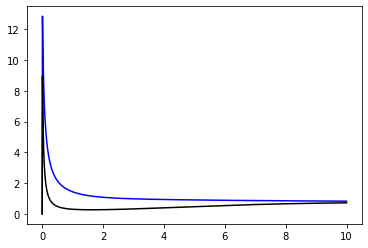

In [75]:
plt.plot(t, x, "b")
plt.plot(t, y, "k")
plt.show()